# Inleveropgave 1: Model-based Prediction and Control - Berry Hijwegen
## 1.1 Markov Chain
We beginnen bij de simpelste vorm. Discrete time, discrete action space. Een discrete parameter Markov Chain. Maar vanaf nu noemen we het gewoon een Markov Chain.

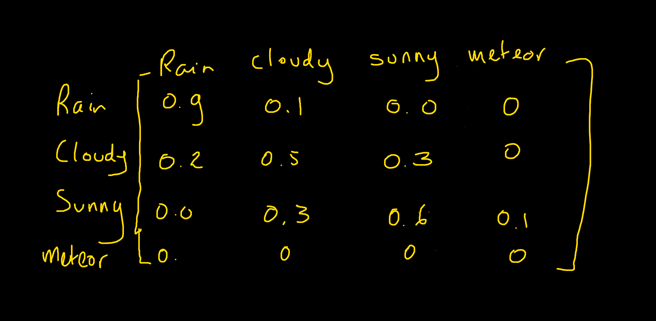

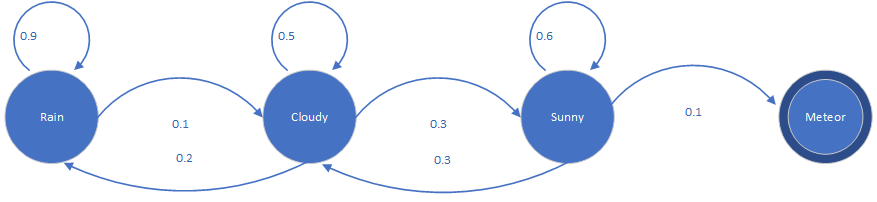

### 1.2 Markov Reward Process
Om van bovenstaande Markov Process een MRP (Markov Reward Process) van te maken hoeven we alleen maar rewards toe te voegen.<br>
Maak van de Markov Process een Markov Reward Process. De states (van links naar rechts) hebben respectievelijk rewards [-2, 0, 3, -10].  Zie het zo: naar de state Rain toe gaan geeft altijd een reward van -2, waar je ook vandaan komt. Het maakt voor de berekeningen niet uit of je zegt dat in een bepaalde state zijn of naar een bepaalde state toegaan de reward geeft. Dus doe wat voor jou intuïtief is.

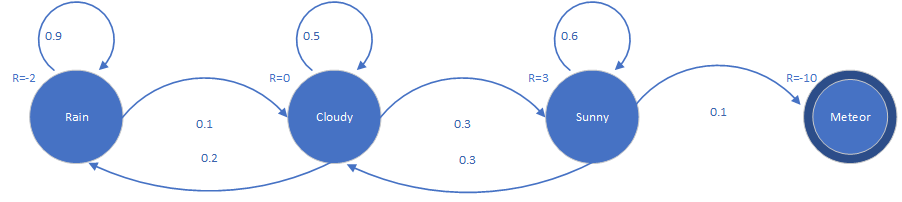

### 1.3 Sampling. Een voorbereiding voor Monte-Carlo Policy Evaluation 
Pak twee mogelijke samples van je MRP en leg uit wat de return Gt  was voor elke sample. Een sample is een reeks transities vanaf een arbitrair gekozen beginstate tot de eindstate. Dus je begint in state s, en loopt een mogelijk pad door het MRP tot aan de eindstate. We beginnen voor het gemak met γ=1. De formule voor de return is als volgt:
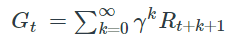


Gegeven γ=1, betekent dat γ<sup>k</sup> = 1.

#### Sample 1
<b>Rain -> Cloudy -> Cloudy -> Sunny -> Meteor</b><br>
G<sub>t</sub> = 1 * 0 + 1 * 0 + 1 * 3 + 1 * -10 = -7.

#### Sample 2
<b>Sunny -> Sunny -> Sunny -> Meteor</b><br>
G<sub>t</sub> = 1 * 3 + 1 * 3 + 1 * -10 = -4.

### 1.4 De value-function bepalen

Bepaal nu voor alle states wat de value is na 2 iteraties. De value voor alle states worden geinitialiseerd op 0. Gebruik hiervoor de Bellman expectation equation met γ=1. 

#### Iteratie 1
Rain<br>0.9 * (-2 + 0) + 0.1 * (0 + 0) = -1.8<br>
Cloudy<br>0.5 * (0 + 0) + 0.2 * (-2 + 0) + 0.3 * (3 + 0) = 0.5<br>
Sunny<br>0.6 * (3 + 0) + 0.3 * (0 + 0) + 0.1 * (-10 + 0) = 0.8

#### Iteratie 2
Rain<br>0.9 * (-2 + -1.8) + 0.1 * (0 + 0.5) = -3.37<br>
Cloudy<br>0.5 * (0 + 0.5 + 0.2 * (-2 + -1.8) + 0.3 * (3 + 0.8) = 0.63<br>
Sunny<br>0.6 * (3 + 0.8) + 0.3 * (0 + 0.5) + 0.1 * (-10 + 0) = 1.43

| State | Value<sub>0</sub> | Value<sub>1</sub> | Value<sub>2</sub> |
|---|---|---|---|
| Rain | 0 | -1.8 | -3.37 |
| Cloudy | 0 | 0.5 | 0.63 |
| Sunny | 0 | 0.8 | 1.43 |
| Meteor | 0 | 0 | 0 |

### 1.5 Zelf-onderzoek γ=1
- Tijd wordt hiermee niet als factor meegenomen, terwijl data uit de nabije toekomst veel betrouwbaarder kan zijn dan data in de verre toekomst.
- Er is een mogelijkheid dat hiermee endless loops optreden.

## 2. Control met Value Iteration
Bepaal de utility van elke state (value function) van onderstaande MDP, je mag zelf kiezen wanneer je stopt met itereren maar beargumenteer waarom. Te vroeg stoppen is niet goed. Neem een discount factor van γ=1

De value voor alle states worden geinitialiseerd op 0.
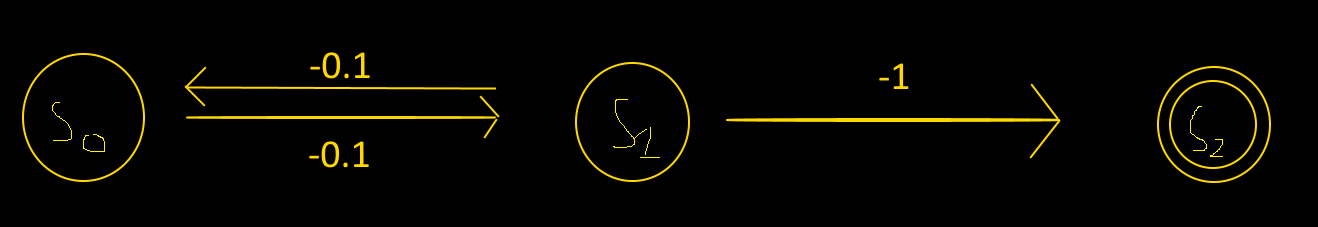


<b>Beginwaardes</b><br>
V(s<sub>0</sub>) = 0<br>
V(s<sub>1</sub>) = 0<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 1</b><br>
V(s<sub>0</sub>) = -0.1 + 0 * 1 = -0.1<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + 0 * 1) = -0.1<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 2</b><br>
V(s<sub>0</sub>) = -0.1 + -0.1 * 1 = -0.2<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -0.1 * 1) = -0.2<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 3</b><br>
V(s<sub>0</sub>) = -0.1 + -0.2 * 1 = -0.3<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -0.2 * 1) = -0.3<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 4</b><br>
V(s<sub>0</sub>) = -0.1 + -0.3 * 1 = -0.4<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -0.3 * 1) = -0.4<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 5</b><br>
V(s<sub>0</sub>) = -0.1 + -0.4 * 1 = -0.5<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -0.4 * 1) = -0.5<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 6</b><br>
V(s<sub>0</sub>) = -0.1 + -0.5 * 1 = -0.6<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -0.5 * 1) = -0.6<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 7</b><br>
V(s<sub>0</sub>) = -0.1 + -0.6 * 1 = -0.7<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -0.6 * 1) = -0.7<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 8</b><br>
V(s<sub>0</sub>) = -0.1 + -0.7 * 1 = -0.8<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -0.7 * 1) = -0.8<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 9</b><br>
V(s<sub>0</sub>) = -0.1 + -0.8 * 1 = -0.9<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -0.8 * 1) = -0.9<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 10</b><br>
V(s<sub>0</sub>) = -0.1 + -0.9 * 1 = -1<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -0.9 * 1) = -1<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 11</b><br>
V(s<sub>0</sub>) = -0.1 + -1 * 1 = -1.1<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -1 * 1) = -1<br>
V(s<sub>2</sub>) = 0<br>
<b>Iteratie 12</b><br>
V(s<sub>0</sub>) = -0.1 + -1 * 1 = -1.1<br>
V(s<sub>1</sub>) = max(-1 + 0 * 0, -0.1 + -1 * 1) = -1<br>
V(s<sub>2</sub>) = 0<br>

Convergentie vindt plaats waar V(s<sub>0</sub>) = -1.1, V(s<sub>1</sub>) = -1, V(s<sub>2</sub>) = 0. Vanuit hier geen daling meer dus stoppen met itereren.

## 3. Implementatie

In [238]:
import numpy as np

In [313]:
class Maze():
    def __init__(self, rewards: np.array, start_pos: tuple, exit_positions: list, chance: float):
        self.rewards = rewards
        self.start_pos = start_pos
        self.exit_positions = exit_positions
        self.chance = chance

        # bind moves to constant
        self.actions = {
            "UP": (-1, 0),
            "DOWN": (1, 0),
            "LEFT": (0, -1),
            "RIGHT": (0, 1),
        }

    # Take probability into account while retrieving the next action
    def get_actual_action(self, desired_action: str):
        other_actions = list(set(self.actions.keys())- {desired_action})
        chance_left = 1 - self.chance
        chance_per_action = round(chance_left / len(other_actions), 1)
        other_probabilities = [chance_per_action for _ in range(0, len(other_actions))]

        return np.random.choice(
            [desired_action, *other_actions],
            replace=False,
            p=[self.chance, *other_probabilities]
        )
    
    # Get next position giving a certain action
    def get_next_position(self, location: tuple, action: str):
        x_dim, y_dim = self.rewards.shape
        y, x = location
        next_y, next_x = self.actions[action]
        next_x += x
        next_y += y

        # Check if position is inside grid, else stay in same place
        if (next_x >= 0 and next_x < x_dim and next_y >= 0 and next_y < y_dim):
            return (next_y, next_x)

        return location
    
    
    def value_iteration(self, theta: float = 0.001):
        n_actions = len(self.actions.keys())
        V = np.zeros(self.rewards.shape)
        while True:
            delta = 0
            for y in range(self.rewards.shape[0]):
                for x in range(self.rewards.shape[1]):  
                    location = (y, x)
                    if location in self.exit_positions:
                        continue

                    # Find best action
                    A = self.lookahead_step(location, V)
                    max_val = np.max(A)
                    delta = max(delta, np.abs(max_val - V[location]))
                    # Update value function
                    V[location] = max_val
            if delta < theta:
                break

        V = np.add(V, self.rewards)

        # Generate policy by using optimal value function
        policy = np.zeros([self.rewards.shape[0], self.rewards.shape[1], n_actions])
        for y in range(self.rewards.shape[0]):
            for x in range(self.rewards.shape[1]):
                location = (y, x)

                A = self.lookahead_step(location, V)
                best_action = np.argmax(A)
                policy[y, x, best_action] = 1.0

        return policy, V

    # Find most optimal step
    def lookahead_step(self, location: tuple, V: np.array, discount_factor: float = 1.0):
        n_actions = len(self.actions.keys())
        A = np.zeros(n_actions)
        a_idx = 0
        for action in self.actions.keys():
            next_state = self.get_next_position(location, action)
            if next_state == location:
                continue
            A[a_idx] = self.chance * (self.rewards[next_state] + discount_factor * V[next_state])
            a_idx += 1
        return A
    
    def run(self, policy):
        list_actions = list(self.actions.keys())
        location = self.start_pos
        while True:
            if location in self.exit_positions:
                print(f"Score: {self.rewards[location]}")
                break
            desired_action = np.argmax(policy[location])
            actual_action = self.get_actual_action(list_actions[desired_action])
            location = self.get_next_position(location, actual_action)

In [314]:
start_pos = (3, 2)
exit_positions = [(3, 0), (0, 3), (3, 1)]
rewards = np.array([
    [-1, -1, -1, 40],
    [-1, -1, -10, -10],
    [-1, -1, -1, -1],
    [10, -2, -1, -1],
])
chance = .7
maze = Maze(
    rewards,
    start_pos,
    exit_positions,
    chance
)

In [315]:
policy, v = maze.value_iteration()

In [316]:
maze.run(policy)

Score: 40
